# Simple image processing using MNIST dataset and Keras (with CNN)

In the previous exercise we saw how we could achieve over 96% accuracy in predicting the digits of the MNIST dataset using Dense module of Keras. But in the end we witnessed a wrong prediction. 

Here we'll try to increase the accuracy more using Convolutional Neural Networks.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
#Load the data
mnist = input_data.read_data_sets('./')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [14]:
# Defining a function to extract data in batches form the dataset
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

### Now let's build up the model

Notice the Conv2D layer at first. Then we flatten the model before feeding it to the softmax layer in the end.

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adadelta', loss='sparse_categorical_crossentropy')

In [18]:
#Let's train

model.fit_generator(train_data_generator(250), mnist.train.num_examples//500, epochs=10)

Epoch 1/10
110/110 [==============================] - 11s 95ms/step - loss: 0.5312
Epoch 2/10
110/110 [==============================] - 10s 91ms/step - loss: 0.2428
Epoch 3/10
110/110 [==============================] - 12s 112ms/step - loss: 0.1643
Epoch 4/10
110/110 [==============================] - 37s 338ms/step - loss: 0.1310
Epoch 5/10
110/110 [==============================] - 12s 111ms/step - loss: 0.1002
Epoch 6/10
110/110 [==============================] - 11s 101ms/step - loss: 0.0929
Epoch 7/10
110/110 [==============================] - 11s 101ms/step - loss: 0.0737
Epoch 8/10
110/110 [==============================] - 11s 103ms/step - loss: 0.0779
Epoch 9/10
110/110 [==============================] - 12s 105ms/step - loss: 0.0652
Epoch 10/10
110/110 [==============================] - 12s 105ms/step - loss: 0.0613


In [21]:
#Now let's check the accuracy with more data

import numpy as np

x_test, y_test = mnist.train.next_batch(500)
x_test = x_test.reshape((-1,28,28,1))
y_pred = model.predict_classes(x_test)
accuracy = np.count_nonzero(y_pred == y_test)/len(y_test)
print(accuracy)

0.988


### Here we see an accuracy of over 98%. Nice!

Now let's visualize some predictions

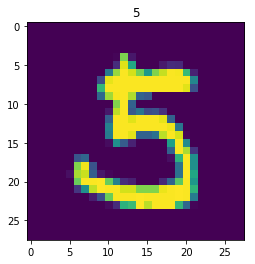

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

x_test, y_test = mnist.train.next_batch(5000)

img = x_test[232]
test_img = img.reshape((-1,28,28,1))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

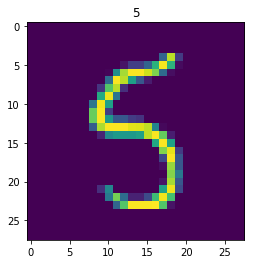

In [24]:
img = x_test[4126]
test_img = img.reshape((-1,28,28,1))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

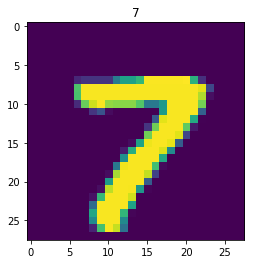

In [26]:
img = x_test[85]
test_img = img.reshape((-1,28,28,1))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

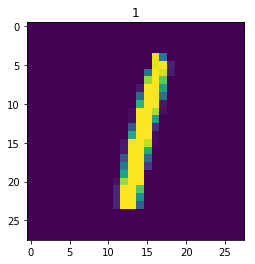

In [27]:
img = x_test[22]
test_img = img.reshape((-1,28,28,1))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

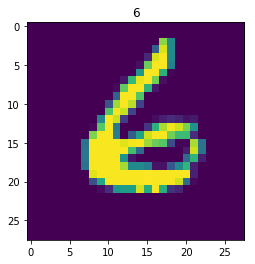

In [28]:
img = x_test[6]
test_img = img.reshape((-1,28,28,1))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

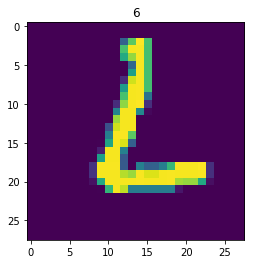

In [29]:
img = x_test[951]
test_img = img.reshape((-1,28,28,1))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

As it can be seen here, the model preforms quite well with even noisy inputs

## Let's try and increase the accuracy more by using a technique known as Max pooling

Modifying the model

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [32]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 109s 508ms/step - loss: 0.5004


In [34]:
#If we perform the accuracy test again

x_test, y_test = mnist.train.next_batch(500)
x_test = x_test.reshape((-1,28,28,1))
y_pred = model.predict_classes(x_test)
accuracy = np.count_nonzero(y_pred == y_test)/len(y_test)
print(accuracy)

0.966


Oh! we get reduced accuracy. This is where advance concepts of ML come into play with puching that minute amount closer to 100%. Anyways this marks a good start if you're getting into using Neural Networks.